# Лабораторна робота 5 (1 частина)

Романенко Ілля ФІТ 4-7

23 варіант

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## Крок 1

завантажуємо датасет іріс

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
dataFrame = pd.DataFrame(x, columns=iris.feature_names)

dataFrame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


проведемо попередній аналіз

In [3]:
dataFrame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Крок 2

масштабуємо дані, та визначимо оптимальну кількість кластерів

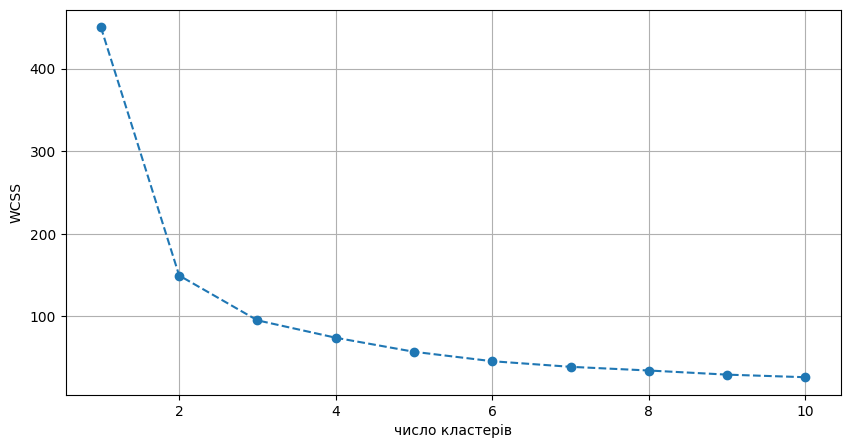

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

x_2d = pd.DataFrame(X_scaled, columns=iris.feature_names).iloc[:, 1:]

wcss_2d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=42)
    kmeans.fit(x_2d)
    wcss_2d.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_2d, marker='o', linestyle='--')
plt.xlabel('число кластерів')
plt.ylabel('WCSS')
plt.grid()
plt.show()

2 кластери буде оптимальним числом за методом ліктя

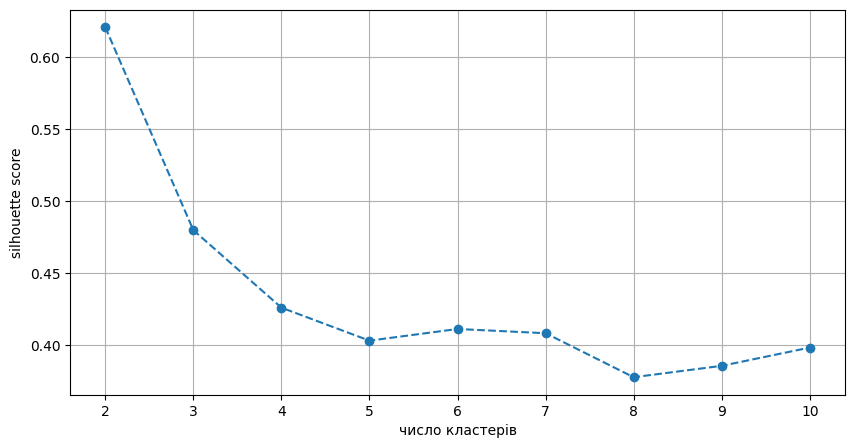

In [6]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=42)
    cluster_labeles = kmeans.fit(x_2d)
    silhouette_scores.append(silhouette_score(x_2d, kmeans.labels_))


plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('число кластерів')
plt.ylabel('silhouette score')
plt.grid()
plt.show()

2 кластери буде оптимальною кількістю за методом силуетів

## Крок 3

візуалізуємо кластери даних

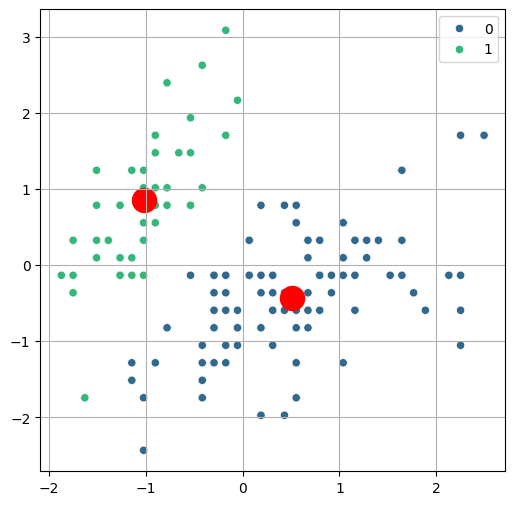

In [7]:
kMeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kMeans.fit_predict(X_scaled)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', legend='full')
plt.scatter(kMeans.cluster_centers_[:, 0], kMeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.grid()
plt.show()

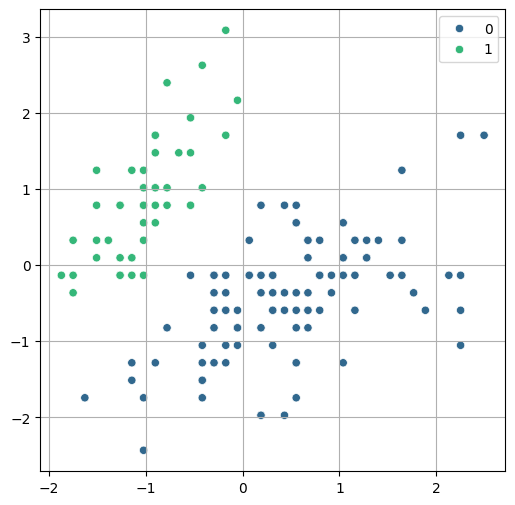

In [8]:
clustering = AgglomerativeClustering(n_clusters=2)
labels = clustering.fit_predict(X_scaled)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis', legend='full')
plt.grid()
plt.show()

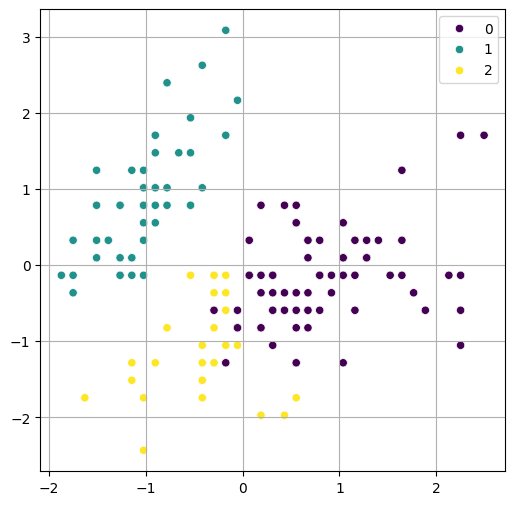

In [9]:
clustering = AgglomerativeClustering(n_clusters=3)
labels = clustering.fit_predict(X_scaled)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis', legend='full')
plt.grid()
plt.show()

## Отримали наступні результати

- загалом пропонується використати 2 кластери, як оптимальний результат

- на моб думку, також можна розділити дані на 3 кластери, так як один з них досить великий, та може насправді містити змішані дані, що досить схожі